###Aim
Study the behaviour of a string grammar . 

In [1]:
%matplotlib inline
#draw stick figures
import networkx as nx

In [2]:
from logging import getLogger 
from eden.util import configure_logging
configure_logging(getLogger('root'),verbosity=1)

/Library/Python/2.7/site-packages/pygraphviz/agraph.py:1281: RuntimeWarning: Fontconfig warning: ignoring UTF-8: not a valid region tag

  warnings.warn("".join(errors),RuntimeWarning)


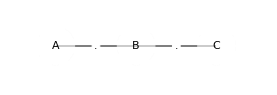

In [3]:
G=nx.path_graph(3)
G.node[0]['label']='A'
G.node[1]['label']='B'
G.node[2]['label']='C'
G.edge[0][1]['label']='.'
G.edge[1][2]['label']='.'

from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g1 = G.copy()

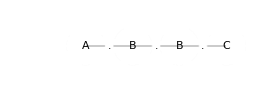

In [4]:
G=nx.path_graph(4)
G.node[0]['label']='A'
G.node[1]['label']='B'
G.node[2]['label']='B'
G.node[3]['label']='C'
G.edge[0][1]['label']='.'
G.edge[1][2]['label']='.'
G.edge[2][3]['label']='.'

from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g2 = G.copy()

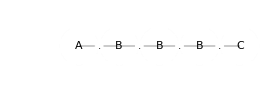

In [5]:
G=nx.path_graph(5)
G.node[0]['label']='A'
G.node[1]['label']='B'
G.node[2]['label']='B'
G.node[3]['label']='B'
G.node[4]['label']='C'
G.edge[0][1]['label']='.'
G.edge[1][2]['label']='.'
G.edge[2][3]['label']='.'
G.edge[3][4]['label']='.'

from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g3 = G.copy()

In [20]:
%%time
import graphlearn.utils.draw as myutils
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
gr = [g1,g2,g3,g3,g3]

sampler=gl.GraphLearnSampler(radius_list=[0,1],thickness_list=[1,2], complexity=2)
sampler.fit(gr,n_jobs=-1, core_interface_pair_remove_threshold=1, interface_remove_threshold=1)

CPU times: user 739 ms, sys: 248 ms, total: 987 ms
Wall time: 3.11 s


interface: 1108637


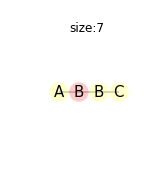

interface: 46579841


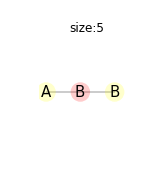

interface: 45106259


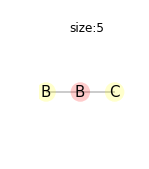

interface: 34202681


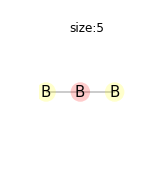

interface: 52484649


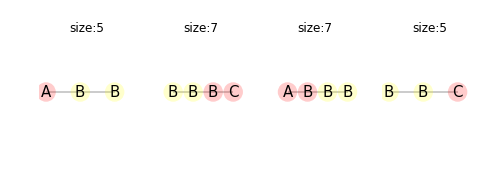

interface: 65015689


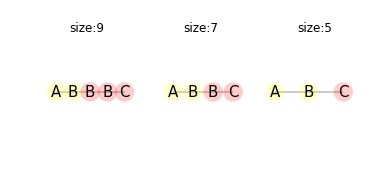

interface: 58675133


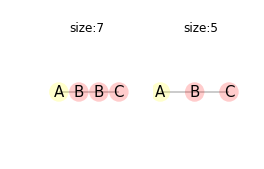

interface: 45318483


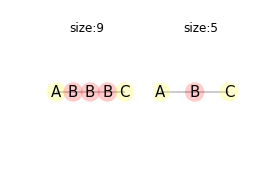

interface: 41637237


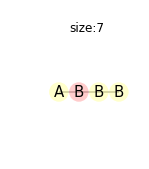

interface: 5179894


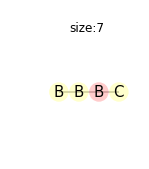

interface: 13881193


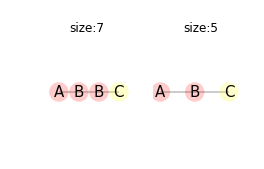

interface: 28979641


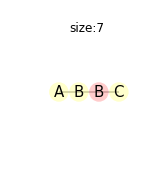

interface: 6004955


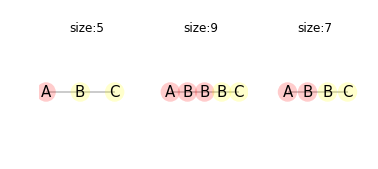

interface: 13973693


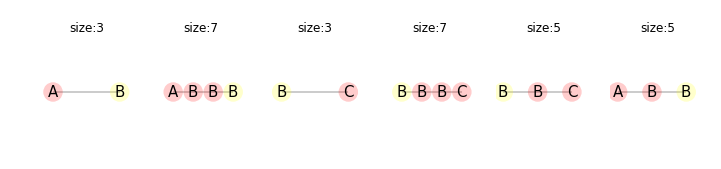

interface: 12040389


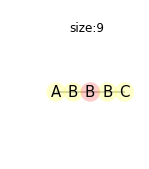

In [32]:
myutils.draw_grammar(sampler.local_substitutable_graph_grammar.grammar,n_productions=None,
                     n_graphs_per_line=7, size=2, 
                     colormap='autumn', invert_colormap=True,
                     vertex_alpha=0.2, edge_alpha=0.2, node_size=380,
                     prog='circo', size_x_to_y_ratio=3)

how often do we see interfacehashes
# productions: 30
x = # interfaces (total: 15)
y=numberofcores(ihash), y=sumOfCoreCounts(ihash)


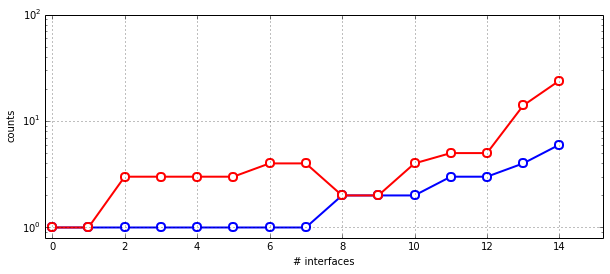

how often was this corehash seen?
x = # cores (total: 8)
y = inYinterfaces(chash), y= sumOfCountOverAllInterfaces(chash)


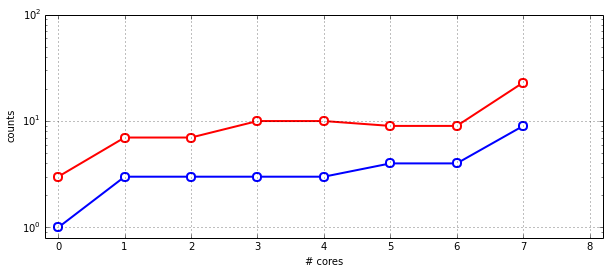

histogram
# productions: 30
distinct cores: 8 (seen on x axis)
interfaces with x many cores were observed y many times. 


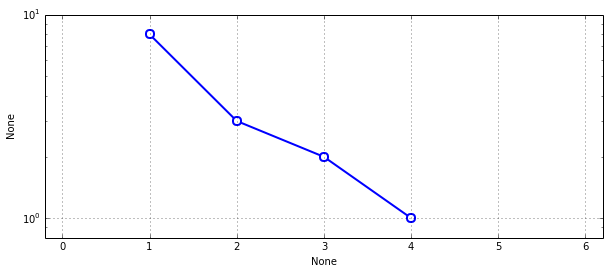

In [22]:
myutils.draw_grammar_stats(sampler.local_substitutable_graph_grammar.grammar)

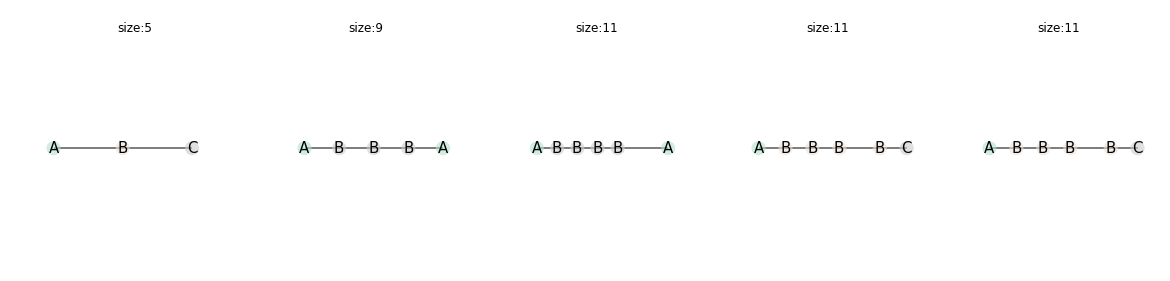

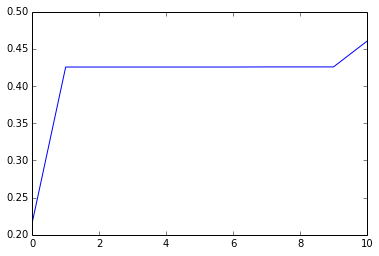

In [31]:
#sample
seed_graphs = [g1]
n_steps=10
sampling_interval=int(n_steps/5)+1
graphs = sampler.sample(seed_graphs,
                        same_radius=False,
                        same_core_size=False,
                        sampling_interval=sampling_interval,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=-1,
                        annealing_factor=1)
#draw
history=[]
for  i, (result,info) in enumerate(graphs):
    history.append(info['score_history'])
    myutils.draw_graph_set(info['graphs'], 
                           colormap='Pastel2', invert_colormap=True,
                           prog='circo', size_x_to_y_ratio=3, vertex_color='_labels_')
    
import matplotlib.pyplot as plt
t = range(n_steps+1) 
for h in history: plt.plot(t, h)
plt.show()